### Packages loading

In [3]:
import sys, qiskit
sys.path.insert(0, '..')
import matplotlib.pyplot as plt
import numpy as np
from qsee.compilation.qsp import QuantumStatePreparation
from qsee.core import ansatz, state, random_circuit
from qsee.backend import constant, utilities
from qsee.evolution import crossover, mutate, selection, threshold
from qsee.evolution.environment import EEnvironment, EEnvironmentMetadata
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
num_qubits = 4
if num_qubits == 2:
    qc_haar = state.specific([0.73042448, -0.30956267, -0.45658101,  0.40272176])
if num_qubits == 3:
    qc_haar = state.specific([0.38816776, 0.45183516, 0.32540635, 0.38030759, 0.43981021, 0.27571956,
                              0.31378091, 0.163508])
if num_qubits == 4:
    qc_haar = state.specific([0.16839584, 0.30689652, 0.2897173,  0.30737815, 0.22951718, 0.1408441,
                              0.03976117, 0.08855247, 0.11344706, 0.12202314, 0.34881966, 0.29205615,
                              0.51839765, 0.24766735, 0.13829656, 0.1821242])



def compilation_fitness_haar(qc: qiskit.QuantumCircuit):
    qsp = QuantumStatePreparation(
        u=qc,
        target_state=qc_haar.inverse()
    ).fit(num_steps=10)
    return 1 - np.min(qsp.compiler.metrics['loss_fubini_study'])

def full_compilation_fitness_haar(qc: qiskit.QuantumCircuit):
    qsp = QuantumStatePreparation(
        u=qc,
        target_state=qc_haar.inverse()
    ).fit(num_steps=100)
    return 1 - np.min(qsp.compiler.metrics['loss_fubini_study'])

Main algorithm, includes: init population, selection, crossover, mutate.

In [15]:
depth = 4
num_circuit = 16
env_metadata = EEnvironmentMetadata(
    num_qubits = num_qubits,
    depth = depth,
    num_circuit = num_circuit,
    num_generation = 20,
    prob_mutate=3/(depth * num_circuit)
)
env = EEnvironment(
    metadata = env_metadata,
    fitness_func=[compilation_fitness_haar, full_compilation_fitness_haar],
    selection_func=selection.elitist_selection,
    crossover_func=crossover.onepoint_crossover,
    mutate_func=mutate.layerflip_mutate,
    threshold_func=threshold.compilation_threshold
)
env.evol()


Initialize list of circuit ...
Start evol progress ...
Evol at generation 1
[0.04663752958279288, 0.05914932109287396, 0.5426161349588291, 0.09506906340870414, 0.1246143706914078, 0.5381558704497804, 0.11597511347247702, 0.087366448129371, 0.26938382169568675, 0.1822592097736594, 0.3040114943477873, 0.25206952194739385, 0.2795140528781981, 0.5350268824974933, 0.29218646523254443, 0.060798211245314926]
Evol at generation 2
[0.40720998658884267, 0.5348118660154797, 0.536103459810272, 0.5439298299603448, 0.5326671421780831, 0.2972909563695654, 0.5320256417280964, 0.5330952988028499, 0.29140985047772505, 0.2773659293944133, 0.2820167132864442, 0.15892925386742884, 0.2720576945938641, 0.25100066755703987, 0.5455772892999294, 0.27233249351094424]
Evol at generation 3
[0.5307452717339973, 0.5476726848840543, 0.2550838973414523, 0.15123619304308222, 0.5341674120459154, 0.5381558704497804, 0.5409793032988599, 0.538480769631427, 0.5379393979140832, 0.3237603974921315, 0.536966523888391, 0.462040

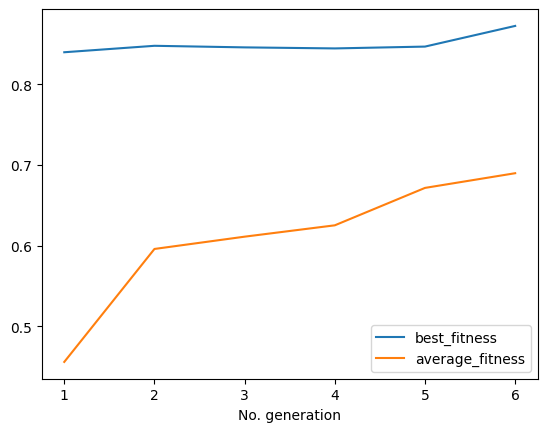

In [13]:
env.plot()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


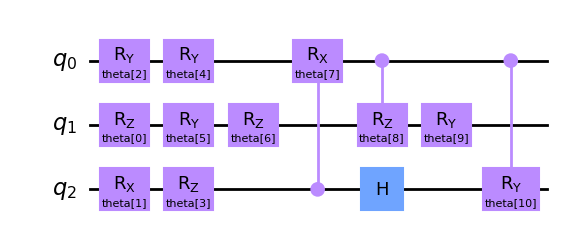

In [8]:
env.best_circuit.draw('mpl')

In [9]:
full_compilation_fitness_haar(env.best_circuit)

0.9552786404500042